# Credit Risk Probability of Default - Data Exploration

### Packages and Libraries 

In [1]:
# importing libraries and packages
import pandas as pd
import numpy as np


# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# statistics libraries
import scipy.stats as stats
import statsmodels.api as sm


# external libraries and packages
import time as time
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_columns', None) # display max number of columns
pd.set_option('display.max_rows',None) # display max number of rows
pd.set_option('display.float_format','{:.2f}'.format)

--------------------------------------------------------------------------------------------------------------------------------

### Loading the dataset

In [3]:
# Loading the dataset in the work environment
dataset_loan = pd.read_csv('./data/raw/Loan_Dataset.csv', low_memory = False)

# viewing a sample rows from the dataset
dataset_loan.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
399792,NaN,NaN,27000,27000,27000.0,36 months,11.98,896.53,B,B5,Registered nurse,2 years,RENT,95000.0,Verified,Mar-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,112xx,NY,21.34,0.0,Jul-2012,0.0,NaN,NaN,18.0,0.0,25392,89.7,19.0,f,19748.44,19748.44,9825.890000,9825.89,7251.56,2574.33,0.0,0.0,0.0,Feb-2019,896.53,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,85269.0,0.0,11.0,0.0,0.0,31.0,59877.0,80.0,0.0,1.0,16877.0,83.0,28300.0,0.0,0.0,0.0,1.0,4737.0,861.0,96.3,0.0,0.0,68.0,60.0,18.0,18.0,0.0,31.0,NaN,NaN,NaN,0.0,5.0,7.0,5.0,5.0,12.0,7.0,7.0,7.0,18.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,102809.0,85269.0,23500.0,74509.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
184484,NaN,NaN,40000,40000,40000.0,60 months,12.73,904.61,B,B5,Unit Manager,10+ years,MORTGAGE,90500.0,Verified,Aug-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,245xx,VA,26.65,0.0,Sep-2006,1.0,NaN,NaN,11.0,0.0,25801,70.9,29.0,w,37040.83,37040.83,5399.370000,5399.37,2959.17,2440.20,0.0,0.0,0.0,Feb-2019,904.61,Mar-2019,Feb-2019,0.0,NaN,1,Joint App,140500.0,29.12,NaN,0.0,0.0,329586.0,1.0,4.0,1.0,3.0,4.0,98490.0,85.0,0.0,0.0,8266.0,80.0,36400.0,0.0,2.0,2.0,3.0,29962.0,2097.0,91.2,0.0,0.0,143.0,96.0,36.0,4.0,4.0,62.0,NaN,4.0,NaN,0.0,3.0,5.0,3.0,4.0,17.0,6.0,8.0,5.0,11.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,362063.0,124291.0,23800.0,108663.0,68650.0,Sep-2006,1.0,4.0,11.0,80.4,2.0,11.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
1712993,NaN,NaN,35000,35000,35000.0,36 months,14.30,1201.33,C,C1,Director,3 years,MORTGAGE,155000.0,Source 

Loan dataset has numerical and categorical features along with few columns with missing values. We will be going through these features one by one to identify their importance and select the most revelvant features for training the model. 

Let's know more about the loan dataset, before proceeding ahead.

In [12]:
# checking the shape of the dataset
print(f"Loan dataset has a shape of {dataset_loan.shape}")

Loan dataset has a shape of (2260668, 145)


So in total we have 145 features with +2 Million observation in the raw dataset which needs to be cleaned and modified according to our observations and requirement for model training and evaluation for a more generalized model which is able to customer default rate in advance before the issuing the loan from the client.  

In [13]:
# basic informaiton about the dataset
dataset_loan.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 5.8 GB


Because of the large number of feature dataframe.info() is not showing the detail breakdown of each feature and it's datatype. 

But we can conculde from the output that that we have 4 features with int64, 105 features with float64 and 36 features that are of object datatypes. 

We will have to check one by one these features for their datatype and convert or make changes accordingly. 

Before we will have to make a fucntion that will help to see the various other information about the no. of observations in the dataset, unique values in the dataset, percentage of missing values and so on, before proceeding ahead. 

**Task**
   - Duplicate values.
   - Correct Datatypes (**To be handle during EDA**)
   - Converting feature into more meaningful format. (**Handle During EDA**)
   - Missing values.

**Check for Duplicated values**

Duplicate rows can cause bias in model training for Porbability of Default(PD), impacting our model performance as they effectively give more/increase weight to certain samples.They may also indicate data collection issues.

Identifying and removing them from the dataset, helps to ensure data integrity.


In [5]:
# check for duplicated values in the loan dataset
dataset_loan.duplicated().sum()

0

As we can see we don't have any duplicate values in the loan dataset.

**Checking for Null Values/ Missing Values in the loan dataset**

Missing values can lead to error during data processing and may cause bias on inaccurate predictions in machine learning models. Detecting them early allows us to decide on appropriate handling methods, such as imputation or removal to maintin data quality.

Dropping rows with complete null values, as it's essential to remove them as we proceed ahead with finding null values in the features column wise.

In [ ]:
# Dropping rows with complete null values.
dataset_loan.dropna(axis = 0, how = 'all')

# checking the shape of the loan dataset after dropping the rows with complete null values.
print(f'Shape of loan dataset after dropping rows with complete null values is {dataset_loan.shape}.')

After comparing the before and after shape of loan dataset we can conclude that there were no rows with complete missing values.

Because of large number of feature in the loan dataset, we will be creating a function that will help to list all the features along with non-null values, null values count, percent of null values and datatype of these features as info() is not able to show all the 145 features.

In [11]:
def dataset_meta_data(dataset):
    
    # dataframe to store the meta information about each features
    dataset_meta = pd.DataFrame(columns = ['Feature_name','Non_Null_Values',
                                           'Null_Values','%_Null_Values',
                                           'Unique_Values','Data_Type'])
    # length of the dataset
    l = len(dataset)
    
    # loop to collect meta data for each feature and append to dataset_meta
    for col in dataset.columns:
        
        # know the null values in the feature
        null_value_count = dataset[col].isnull().sum()
        
        # append the meta data about each feature
        dataset_meta.loc[len(dataset_meta),:] = [col,
                                                 dataset[col].notnull().sum(),
                                                 null_value_count,
                                                 round(null_value_count*100/l,2),
                                                 dataset[col].nunique(),
                                                 dataset[col].dtype
                                                ]
    
    # return the dataset_meta
    return dataset_meta    

In [16]:
# view the meta data of loan dataset using dataset_meta_data()
dataset_meta_desc = dataset_meta_data(dataset_loan)

# print the meta data obtained from the dataset_meta_data() function
dataset_meta_desc

,Feature_name,Non_Null_Values,Null_Values,%_Null_Values,Unique_Values,Data_Type
0,id,0,1303607,100.0,0,float64
1,member_id,0,1303607,100.0,0,float64
2,loan_amnt,1303607,0,0.0,1553,int64
3,funded_amnt,1303607,0,0.0,1553,int64
4,funded_amnt_inv,1303607,0,0.0,9014,float64
5,term,1303607,0,0.0,2,object
6,int_rate,1303607,0,0.0,654,float64
7,installment,1303607,0,0.0,82574,float64
8,grade,1303607,0,0.0,7,object
9,sub_grade,1303607,0,0.0,35,object


As we can see from the above table that there are too many columns with missing values and few of the categorical features with too many categories. We will first have to see deal with the null values in the features and set a threshold for the percent of null values that we can use for the features. 

For setting the threshold for percent of null values in the feature, let's first sort the dataset_meta_desc for better understanding about the null values.

We will view the columns with null values more than 1% as according to dataset_meta_desc we have few features with less than or close to 0%(i.e 100-2000 values missing) and won't make sense to view for this analysis.

In [23]:
# sorting the detaset_meta_desc better understanding of percent of null values 
dataset_meta_desc[dataset_meta_desc['%_Null_Values']>1].sort_values(by = ['%_Null_Values'], ascending = False)

,Feature_name,Non_Null_Values,Null_Values,%_Null_Values,Unique_Values,Data_Type
0,id,0,2260668,100.0,0,float64
18,url,0,2260668,100.0,0,float64
1,member_id,0,2260668,100.0,0,float64
134,orig_projected_additional_accrued_interest,8426,2252242,99.63,7313,float64
131,hardship_length,10613,2250055,99.53,1,float64
124,hardship_reason,10613,2250055,99.53,9,object
125,hardship_status,10613,2250055,99.53,3,object
126,deferral_term,10613,2250055,99.53,1,float64
127,hardship_amount,10613,2250055,99.53,8950,float64
128,hardship_start_date,10613,2250055,99.53,26,object


We can see that there is a clear distinction in the percent of null values in the loan dataset.

**Observation**

   - **100%** - These are either featues with either unique values or descriptive features like url which won't help in model training.
   
       **Features (`id`, `url`, `member_id`)**
    
   - **98.41-99.53** -> These features are related to depth settlement or hardship features which is out of scope for this model as of now. We can try to make a different model for predicting loan status during depth settlement and hardship type. We can seperate these values from the dataset.
   
       **Features - (`sec_app_mths_since_last_major_derog, debt_settlement_flag_date, settlement_status, settlement_date, settlement_amount, settlement_percentage, settlement_term`)**
       
       
    
   - **94 to 95.22 %** -> These features are mostly talking about the second applicant in the joint application for the loan. Most of the values present will be useful for defining the models for a joint application model. But currently we are making a model for both single and joint application.
   
       **Features - (`desc, annual_inc_joint, dti_joint, verification_status_joint, revol_bal_joint, sec_app_earliest_cr_line, sec_app_inq_last_6mths, sec_app_mort_acc, sec_app_open_acc, sec_app_revol_util, sec_app_open_act_il, sec_app_num_rev_accts, sec_app_chargeoff_within_12_mths, sec_app_collections_12_mths_ex_med`)**
       
    
   - **40.25 to 84.11** -> these features are various information about the customers which is linked to the current loan/ credit provided by the client. As we are making model for predicting the loan default before the issusing the loan we can drop these features.
   
       **Features - (`mths_since_last_delinq, mths_since_last_record, next_pymnt_d, mths_since_last_major_derog, mths_since_rcnt_il, il_util, mths_since_recent_bc_dlq, mths_since_recent_revol_delinq`)**
       
       
    
   - **38.1 %** -> these features talk about the final conditions of the borrowers and have to be evaluated. 
   
       **Features - (`open_acc_6m, open_act_il, open_il_12m, open_il_24m, total_bal_il, open_rv_12m, open_rv_24m, max_bal_bc, all_util, inq_fi, total_cu_tl, inq_last_12m`)**
   
    
   - **1% to 13.07%** -> these features are from various aspect and has to be evaluated one by one and selected according to the importance towards the task at hand.
   
       **Features - (`emp_title, emp_length, title, tot_coll_amt, tot_cur_bal, total_rev_hi_lim, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_inq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, pct_tl_nvr_dlq, percent_bc_gt_75, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit`)**

In [18]:
# knowing the number of columns according to null values segregation. 

# features with 100% null values
null_values_100 = dataset_meta_desc[dataset_meta_desc["%_Null_Values"]==100].iloc[:,0]
print(f'Features with 100% null values are {", ".join(null_values_100)} and count is {len(null_values_100.values)} .')

print("\n")
# features with 98.41 to 99.53% null values 
null_values_98_99 = dataset_meta_desc[(dataset_meta_desc["%_Null_Values"]>98) & (dataset_meta_desc["%_Null_Values"]<99)].iloc[:,0]
print(f'Features with 98.41 to 99.53% null values are {", ".join(null_values_98_99)} and count is {len(null_values_98_99.values)} .')

print("\n")
# features with 94 to 96% null values 
null_values_94_96 = dataset_meta_desc[(dataset_meta_desc["%_Null_Values"]>94) & (dataset_meta_desc["%_Null_Values"]<96)].iloc[:,0]
print(f'Features with 94 to 96% null values are {", ".join(null_values_94_96)} and count is {len(null_values_94_96.values)} .')

print("\n")
# features with 40 to 85% null values 
null_values_40_85 = dataset_meta_desc[(dataset_meta_desc["%_Null_Values"]>40) & (dataset_meta_desc["%_Null_Values"]<85)].iloc[:,0]
print(f'Features with 40 to 85%  null values are {", ".join(null_values_40_85)} and count is {len(null_values_40_85.values)} .')

print("\n")
# features with 38.1% null values 
null_values_38 = dataset_meta_desc[(dataset_meta_desc["%_Null_Values"]<39) & (dataset_meta_desc["%_Null_Values"]>30)].iloc[:,0]
print(f'Features with 38.1% null values are {", ".join(null_values_38)} and count is {len(null_values_38.values)} .')


print("\n")
# features less than 30% null values 
null_values_30 = dataset_meta_desc[(dataset_meta_desc["%_Null_Values"]<30) & (dataset_meta_desc["%_Null_Values"]>1)].iloc[:,0]
print(f'Features with 30% null values are {", ".join(null_values_30)} and count is {len(null_values_30.values)} .')



Features with 100% null values are id, member_id, url, next_pymnt_d and count is 4 .


Features with 98.41 to 99.53% null values are annual_inc_joint, dti_joint, verification_status_joint, revol_bal_joint, sec_app_earliest_cr_line, sec_app_inq_last_6mths, sec_app_mort_acc, sec_app_open_acc, sec_app_revol_util, sec_app_open_act_il, sec_app_num_rev_accts, sec_app_chargeoff_within_12_mths, sec_app_collections_12_mths_ex_med and count is 13 .


Features with 94 to 96% null values are  and count is 0 .


Features with 40 to 85%  null values are mths_since_last_delinq, mths_since_last_record, mths_since_last_major_derog, open_acc_6m, open_act_il, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, inq_fi, total_cu_tl, inq_last_12m, mths_since_recent_bc_dlq, mths_since_recent_revol_delinq and count is 19 .


Features with 38.1% null values are  and count is 0 .


Features with 30% null values are emp_title, emp_length, title, to

**Observation**
    
    - Large number of features are having missing values as seen above.
    - Features could be divided according to the bins of percentage of missing values in that particular features.
    
  **[Note]** Most of these features are kpi that are tracked after the issusing of the loan or credit. So it's important to identify these columns and removing them from the dataset before we proceed with the EDA.
    
**Task**

   - Identify the Target Column
   - Identify the feature that are tracked after the issuance of the loan. **[Feature Selection]**
   - Remove these features which are tracked after issusing loan. [**Feature Selection**]
   - Drop the features with too many Null values. [**Feature Selection**]

-------------------------------------------------------------------------------

### Target Variable

We are trying to predict the loan_status variable in the load dataset.

Let's see the value distribution in loan_status variable.

In [8]:
# value distribution of variable loan_status
dataset_loan['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

According to our business proble, we have to predict the whether the borrower will default before the issuing of the loan or credit line to the customers. So we are only predicting for two categories i.e **Fully Paid and Charged Off** . 

Therefore we will only keep observations with loan_status "Fully Paid" or "Charged Off".

In [9]:
# removing other categories in loan status other than Fully Paid or Charged Off
dataset_loan = dataset_loan.loc[dataset_loan['loan_status'].isin(['Fully Paid','Charged Off'])]

In [32]:
# checking the value distribution between "Fully Paid" and "Charged Off"
dataset_loan['loan_status'].value_counts(dropna = False)

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

In [31]:
# checking the normalized distribution between Fully Paid and Charged Pff
dataset_loan['loan_status'].value_counts(normalize = True, dropna = True)

Fully Paid     0.799284
Charged Off    0.200716
Name: loan_status, dtype: float64

**Observations**
 - Close to 80% of the loans are Fully Paid and around 20% of the loans are Charged Off.
 - We will have to handle the unbalance dataset that we have before training either using cross validation or SMOTE method for optimal performance for our model.
 
**Task**
  - Handle imbalance between the two categories using 
      - Cross Validation method. 
      - Downsampling or upsampling using SMOTE method.

-------------------------------------------------------------------------------

We have done the initial checks for our loan dataset and according to the observations we have few of the tasks that needs to be performed as we move forward. 

We will move with Feature Selection and EDA in the below section

## Data Cleaning - Initial Feature Dropping

Raw loan dataset has 145 features and as per out pervious analysis according to the business problem we have not all the features are useful. 

Definition of the features is provided in the excel file here in data/raw/DataDictionary.xlsx .

We will be dropping features with the following criteria. 
   -  Feature with more than 50% of the data missing.
   -  Feature that won't be available at the time of loan application (i.e credit repayement behaviour features.).

### **Features with too much data missing**

In [17]:
# view the features in descending order to the % of null values
dataset_meta_desc.sort_values(by = '%_Null_Values', ascending = False)

,Feature_name,Non_Null_Values,Null_Values,%_Null_Values,Unique_Values,Data_Type
0,id,0,1303607,100.0,0,float64
47,next_pymnt_d,0,1303607,100.0,0,object
1,member_id,0,1303607,100.0,0,float64
18,url,0,1303607,100.0,0,float64
134,orig_projected_additional_accrued_interest,3433,1300174,99.74,3202,float64
124,hardship_reason,5335,1298272,99.59,9,object
130,payment_plan_start_date,5335,1298272,99.59,25,object
123,hardship_type,5335,1298272,99.59,1,object
125,hardship_status,5335,1298272,99.59,3,object
127,hardship_amount,5335,1298272,99.59,4838,float64


In [30]:
# count of features with null values
print(f"Lona Dataset has {dataset_meta_desc.shape[0]} and out of which {dataset_meta_desc[dataset_meta_desc['%_Null_Values']>0].shape[0]} have null values")

Lona Dataset has 145 and out of which 99 have null values


 After the removal of other categories in loan_status feature, when we check the %_Null_Values in the load dataset we can see **clear distinction** between feature with **50%** missing values comapared to **13%** missing values. 
 
 Hence we decide to make a **threshold of 50%** for dropping the features from further process.

In [53]:
# selecting feature with more than 50% of null values
null_feature_50_list = dataset_meta_desc.loc[dataset_meta_desc['%_Null_Values']>50, 'Feature_name'].to_list()

# view the feature names with more than 50% missing values
print(f"Following is the list of all the feature with missing values more than 50% \n\n {', '.join(null_feature_50_list)}")

print("\n")
# view the count of the these features with 50% missing values 
print(f"Total number of features with 50% missing values is {len(null_feature_50_list)}")

Following is the list of all the feature with missing values more than 50% 

 id, member_id, url, desc, mths_since_last_delinq, mths_since_last_record, next_pymnt_d, mths_since_last_major_derog, annual_inc_joint, dti_joint, verification_status_joint, open_acc_6m, open_act_il, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, inq_fi, total_cu_tl, inq_last_12m, mths_since_recent_bc_dlq, mths_since_recent_revol_delinq, revol_bal_joint, sec_app_earliest_cr_line, sec_app_inq_last_6mths, sec_app_mort_acc, sec_app_open_acc, sec_app_revol_util, sec_app_open_act_il, sec_app_num_rev_accts, sec_app_chargeoff_within_12_mths, sec_app_collections_12_mths_ex_med, sec_app_mths_since_last_major_derog, hardship_type, hardship_reason, hardship_status, deferral_term, hardship_amount, hardship_start_date, hardship_end_date, payment_plan_start_date, hardship_length, hardship_dpd, hardship_loan_status, orig_projected_additional_accrued_intere

Above we can see that there are 58 feature with 50% missing values with their name. We will be dropping these features from the load dataset.

**Dropping Features with 50% missing values.**

In [57]:
# dropping the features with more than 50% missing values.
dataset_loan.drop(columns = null_feature_50_list, axis = 1, inplace = True)

# Shape of the loat dataset after dropping above features 
dataset_loan.shape

(1303607, 87)

After dropping the above mentioned features we are left with 87 features in the load dataset.

### Feature not available during loan application.

In our current form of the loan dataset we have features that are being used to track the latest update on the loan/ credit line of the borrowers which won't be present at the moment of loan application.

Hence we can drop these features from our loan dataset. 

In [61]:
# view all the feature present in the loan dataset
print(f" Following is the list of all the features present in loan dataset \n {dataset_loan.columns}")

 Following is the list of all the features present in loan dataset 
 Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',


Upon checking the definition of these features, we will drop the features that would not been available before lending of the loan. 

In [65]:
# list of the feature that were not present before lending of loan.
drop_feature_list = ['acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'funded_amnt', 'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim']

# drop features not present before lending of loan. 
dataset_loan.drop(columns = drop_feature_list, axis = 1, inplace = True)

Let's view the number of features present now and their names.

In [4]:
# view the features names present in the loat dataset.
print(f'List of the features present in the loan dataset is {len(dataset_loan.columns)} \n\n {", ".join(sorted(dataset_loan.columns))} ')

List of the features present in the loan dataset is 31 

 addr_state, annual_inc, application_type, dti, earliest_cr_line, emp_length, emp_title, grade, home_ownership, initial_list_status, installment, int_rate, issue_d, loan_amnt, loan_status, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mort_acc, open_acc, policy_code, pub_rec, pub_rec_bankruptcies, purpose, revol_bal, revol_util, sub_grade, term, title, total_acc, verification_status, zip_code 


## Exploratory Data Analysis

We will start with exploring the loan dataset after doing basic cleaning of removing features with too many null values and dropping the features that won't be available during the application of loan or credit line.

Before we start with EDA, let's view a sample dataset.

In [9]:
# view sample dataset from the loan dataset
dataset_loan.sample(5)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,policy_code,application_type,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies
659439,8750,36 months,10.49,284.36,B,B3,peace officer,10+ years,RENT,53000.0,Source Verified,Feb-2015,Fully Paid,credit_card,Credit card refinancing,100xx,NY,12.88,Aug-2002,7.0,0.0,8021,36.0,15.0,f,1,Individual,86.0,149.0,0.0,0.0
913371,20000,36 months,8.90,635.07,A,A5,New York Presbyterian Hospital,10+ years,MORTGAGE,62000.0,Verified,Jun-2013,Fully Paid,credit_card,Control,104xx,NY,11.26,May-1991,6.0,0.0,10124,55.3,23.0,f,1,Individual,73.0,268.0,3.0,0.0
286179,2100,36 months,18.99,76.97,D,D3,PA-C,10+ years,MORTGAGE,130000.0,Verified,Nov-2016,Fully Paid,other,Other,903xx,CA,22.23,Sep-1995,10.0,0.0,14323,80.8,17.0,f,1,Individual,254.0,137.0,3.0,0.0
894919,25475,36 months,13.68,866.73,C,C1,HomeTelos,6 years,MORTGAGE,65000.0,Verified,Jul-2013,Charged Off,other,Personal,190xx,PA,11.50,Dec-1997,13.0,0.0,3477,5.8,30.0,f,1,Individual,130.0,189.0,3.0,0.0
29229,30000,36 months,12.61,1005.20,C,C1,Massage Therapist,4 years,RENT,54310.0,Source Verified,Mar-2018,Charged Off,major_purchase,Major purchase,282xx,NC,0.69,Aug-2006,12.0,0.0,0,0.0,31.0,w,1,Individual,139.0,130.0,0.0,0.0


In [10]:
# view the shape of the dataset
print(f'Loan dataset has a following number of observations and features {dataset_loan.shape}')

Loan dataset has a following number of observations and features (1303607, 31)


After the initial cleaning of the dataset we are left with 130K observations and 31 features which we will analyze one by one, try to check for datatypes, transformations needed for the features, check for outliers, distribution of the dataset and perform bivariate analysis.

**Checking for Null Values**

In [15]:
# view the meta data of loan dataset using dataset_meta_data()
dataset_meta_desc_1 = dataset_meta_data(dataset_loan)

# print the meta data obtained from the dataset_meta_data() function
dataset_meta_desc_1

,Feature_name,Non_Null_Values,Null_Values,%_Null_Values,Unique_Values,Data_Type
0,loan_amnt,1303607,0,0.0,1553,int64
1,term,1303607,0,0.0,2,object
2,int_rate,1303607,0,0.0,654,float64
3,installment,1303607,0,0.0,82574,float64
4,grade,1303607,0,0.0,7,object
5,sub_grade,1303607,0,0.0,35,object
6,emp_title,1221028,82579,6.33,371435,object
7,emp_length,1228153,75454,5.79,11,object
8,home_ownership,1303607,0,0.0,6,object
9,annual_inc,1303607,0,0.0,62988,float64


In [18]:
# viewing the meta data about the features in loan dataset in descending order
dataset_meta_desc_1.loc[dataset_meta_desc_1['Null_Values']>0].sort_values(by = '%_Null_Values', ascending = False)

,Feature_name,Non_Null_Values,Null_Values,%_Null_Values,Unique_Values,Data_Type
27,mo_sin_old_il_acct,1199312,104295,8.0,520,float64
6,emp_title,1221028,82579,6.33,371435,object
7,emp_length,1228153,75454,5.79,11,object
28,mo_sin_old_rev_tl_op,1236079,67528,5.18,754,float64
29,mort_acc,1256326,47281,3.63,38,float64
14,title,1288181,15426,1.18,61678,object
22,revol_util,1302797,810,0.06,1363,float64
30,pub_rec_bankruptcies,1302910,697,0.05,12,float64
17,dti,1303295,312,0.02,6870,float64
15,zip_code,1303606,1,0.0,943,object


### Univariate Analysis

We will be starting with univariate analysis of each features one by one and check for following parameters before moving to bivariate analysis and note down any task or featuring engineering task that needs to be performed. 
 - Check for distriubution of each features
 - check for outliers
 - Check for missing values and decided method to remove them according to the presence of outliers in the feature and whether it's numerical or categorical features.

In [17]:
# get the features that have numeric dtypes
numeric_features = [col for col in dataset_loan.columns if dataset_loan[col].dtypes != 'object']
# view the name of these Numeric and Categorical features 
print(f'Following are the numerical columns {numeric_features}')

# get the features with object dtypes
categorical_features = dataset_loan.select_dtypes('object').columns.to_list()
print(f'\nFollowing are the categorical columns {categorical_features}')

Following are the numerical columns ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'policy_code', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc', 'pub_rec_bankruptcies']

Following are the categorical columns ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'application_type']


**Basic Statistic of the loan dataset**

Let's view the basic statistics of the numerical and categorical features in the loan dataset we have.

In [43]:
# view the basic statistics  of the numerical features.
dataset_loan.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,policy_code,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies
count,1303607.00,1303607.00,1303607.00,1303607.00,1303295.00,1303607.00,1303607.00,1303607.00,1302797.00,1303607.00,1303607.00,1199312.00,1236079.00,1256326.00,1302910.00
mean,14416.81,13.26,438.08,76158.99,18.26,11.59,0.22,16235.99,51.91,25.02,1.00,125.84,181.50,1.68,0.13
std,8699.54,4.76,261.06,70048.90,10.94,5.47,0.60,22286.29,24.50,12.00,0.00,52.18,94.34,2.01,0.38
min,500.00,5.31,4.93,0.00,-1.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,2.00,0.00,0.00
25%,8000.00,9.75,248.82,45840.00,11.79,8.00,0.00,5952.00,33.60,16.00,1.00,98.00,117.00,0.00,0.00
50%,12000.00,12.74,375.43,65000.00,17.61,11.00,0.00,11140.00,52.30,23.00,1.00,129.00,164.00,1.00,0.00
75%,20000.00,15.99,580.45,90000.00,24.04,14.00,0.00,19748.00,70.80,32.00,1.00,152.00,230.00,3.00,0.00
max,40000.00,30.99,1719.83,10999200.00,999.00,90.00,86.00,2904836.00,892.30,176.00,1.00,999.00,852.00,51.00,12.00


In [44]:
# viewing the basic statistics of the categorical features.
dataset_loan[categorical_features].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,application_type
count,1303607,1303607,1303607,1221028,1228153,1303607,1303607,1303607,1303607,1303607,1288181,1303606,1303607,1303607,1303607,1303607
unique,2,7,35,371435,11,6,3,139,2,14,61678,943,51,738,2,2
top,36 months,B,C1,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,w,Individual
freq,988754,380152,82815,20496,428547,645496,503726,42727,1041952,757591,638945,14625,191032,9153,751214,1280370


It's necessary to view unique values and their count in each categorical features. 

In [37]:
# view unique and their count in each categorical features.
for col in dataset_loan.select_dtypes('object').columns:
    # printing feature name and it's count of unique values
    print(col.upper() , ' : ', dataset_loan[col].nunique())
    
    if dataset_loan[col].nunique()>51:
        
        # printing only first 51 features 
        print(dataset_loan[col].unique()[:51])
        print("----- and", len(dataset_loan[col].unique())-51, "more",'\n')
        
    else:
        print(dataset_loan[col].unique(),'\n')

TERM  :  2
[' 36 months' ' 60 months'] 

GRADE  :  7
['D' 'C' 'A' 'B' 'E' 'G' 'F'] 

SUB_GRADE  :  35
['D5' 'C4' 'A3' 'B3' 'E5' 'D1' 'C1' 'A4' 'E1' 'B5' 'E4' 'B1' 'D2' 'B4'
 'B2' 'C3' 'A5' 'C2' 'A2' 'C5' 'D3' 'D4' 'E2' 'A1' 'E3' 'G2' 'F1' 'G4'
 'F2' 'F4' 'F3' 'F5' 'G1' 'G5' 'G3'] 

EMP_TITLE  :  371435
['Supervisor ' 'Assistant to the Treasurer (Payroll)' 'Teacher'
 'Accounts Examiner III' 'Senior Director Risk Management'
 'Front office Lead' 'Sewell collision center' 'Manager' 'service advisor'
 'Stylist' 'HR Director ' 'Cabinet maker' 'Associate Research Fellow'
 'Supply chain management ' 'Office Assistant 1' 'Deputy'
 'kitchen and bath designer' 'Executive Casino Host' 'Customer service '
 'District Manager' 'Director of Maintenance ' 'Teacher and Coach'
 'Table Games Dealer ' nan 'QUALITY ASSURANCE' 'Mobile Expert'
 'Customer Advocate' 'Verizon Engineer' 'Dietary Supervisor ' 'operator '
 'Claims manager ' 'Electric Systems Associate ' 'Civil Engineering Tech'
 'Systems Administr

Let's with analyzing each features one by one.

**Functions developed for EDA**

In [64]:
def skew_QQ_plot(feature_name, data):
    # plot the Q-Q plot for the feature 
    stats.probplot(data, dist = 'norm', plot = plt)
    plt.title(f'Q-Q plot for {feature_name}')
    plt.show()
    
    # print the skewness in the data
    print(f'Feature {feature_name} has a skewness of {data.skew()}')

**univariate analysis function**

In [13]:
def univariate_analysis_plot(feature_name, descriptive_name, dataset):
    fig, axs = plt.subplots(3,1, figsize = (12,8))
    
    # Plot A: Histogram plot
    sns.distplot(dataset[feature_name], ax = axs[0], kde = False)
    axs[0].set_title(f'Histogram Plot for {descriptive_name}')
    axs[0].grid()
    
    # Plot B: Distribution Plot
    sns.kdeplot(dataset[feature_name], ax = axs[1], fill = True)
    axs[1].set_title(f'Distribution Plot for {descriptive_name}')
    axs[1].grid()
    
    # Plot C: Box Plot for outlier identification
    sns.boxplot(x = dataset[feature_name], ax = axs[2])
    axs[2].set_title(f'Box Plot for {descriptive_name}')
    axs[2].grid()
    
    plt.tight_layout()
    plt.show()

**Outlier Detection**

In [35]:
import pandas as pd
import numpy as np

def detect_outliers(series, threshold_z=3.5):
    """
    Detect outliers using both IQR and Modified Z-score methods.

    Parameters:
    -----------
    series : pd.Series
        Numeric column of data.
    threshold_z : float, optional
        Threshold for Modified Z-score (default = 3.5).

    Returns:
    --------
    dict with:
        - IQR_outliers (indices)
        - Zscore_outliers (indices)
        - counts of each
    """
    # Drop NaNs for safety
    data = series.dropna()

    # --- IQR Method ---
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = data[(data < lower_bound) | (data > upper_bound)].index
#     print(type(iqr_outliers))
#     print(iqr_outliers.dtype)

    # --- Modified Z-score Method (using median & MAD) ---
    median = np.median(data)
    MAD = np.median(np.abs(data - median))
    if MAD == 0:  # avoid division by zero
        mod_z_scores = np.zeros(len(data))
    else:
        mod_z_scores = 0.6745 * (data - median) / MAD
    zscore_outliers = list(data[np.abs(mod_z_scores) > threshold_z].index)

    return {
        "IQR_outliers": iqr_outliers,
        "IQR_count": len(iqr_outliers),
        
        "ModifiedZ_outliers": zscore_outliers,
        "ModifiedZ_count": len(zscore_outliers)
    }

# # ----------------- Example usage -----------------

# # Create sample skewed data
# np.random.seed(42)
# data = pd.Series(np.concatenate([np.random.normal(50, 5, 100), [120, 130, 150]]))

# result = detect_outliers(data)

# print("IQR Outliers:", result["IQR_count"])
# print("Modified Z Outliers:", result["ModifiedZ_count"])
# print("Indices flagged by IQR:", result["IQR_outliers"].tolist())
# print("Indices flagged by Modified Z-score:", result["ModifiedZ_outliers"].tolist())


### loan_amnt

**loan_amnt** - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [39]:
# basic descriptive stats for loan_amnt
dataset_loan['loan_amnt'].describe()

count   1303607.00
mean      14416.81
std        8699.54
min         500.00
25%        8000.00
50%       12000.00
75%       20000.00
max       40000.00
Name: loan_amnt, dtype: float64

**'loan_amnt'** ranges from min value of 500 to max value of 40000, with mean 14416 and median 12000. As we are seeing a difference in the mean and median value for 'loan_amnt', there is a possibility of skewness in the feature.

Checking for missing values in the 'loan_amnt' features.

In [41]:
# missing values 
print(f'Missing values in the feature loan_amnt is {dataset_loan["loan_amnt"].isna().sum()} ')

Missing values in the feature loan_amnt is 0 


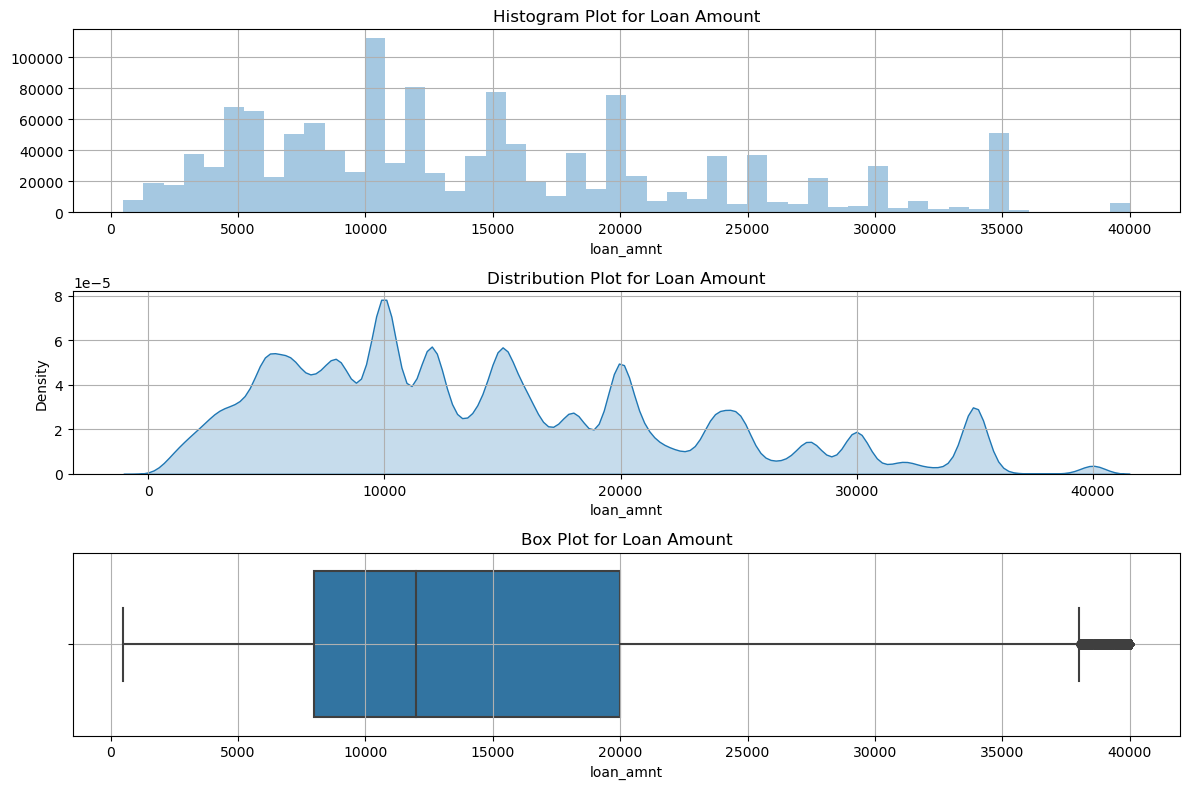

In [24]:
univariate_analysis_plot('loan_amnt', 'Loan Amount', dataset = dataset_loan)

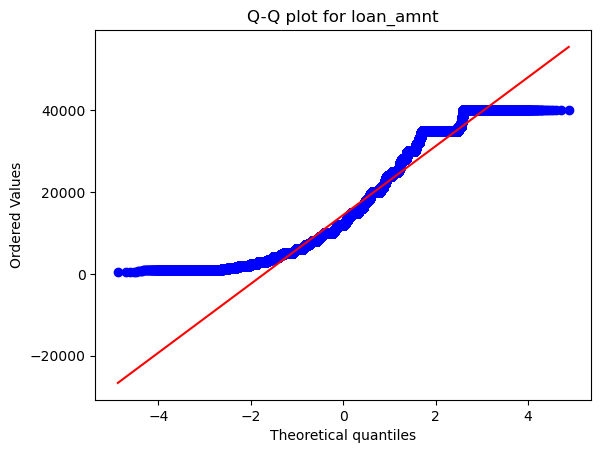

Feature loan_amnt has a skewness of 0.7800933553985989


In [65]:
# check for skewness and plot Q-Q plot for normality
skew_QQ_plot('loan_amnt', data = dataset_loan['loan_amnt'])

Feature loan_amnt has a skewness of 0.7800933553985989


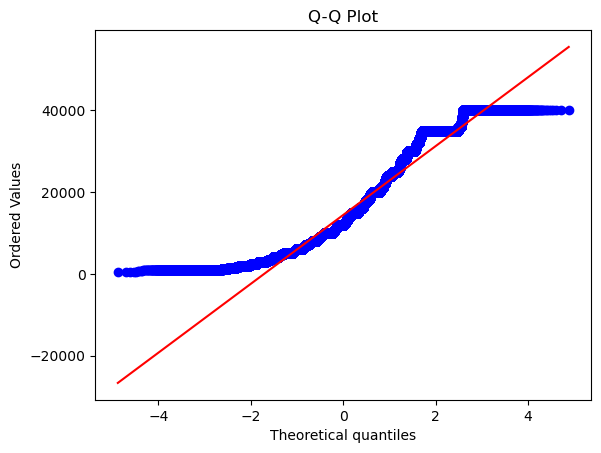

In [38]:
# check for skewness 
print(f'Feature loan_amnt has a skewness of {dataset_loan["loan_amnt"].skew()}')

# Q-Q plot for normality
stats.probplot(dataset_loan['loan_amnt'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

0.35159205552833134
-0.04282046975814755


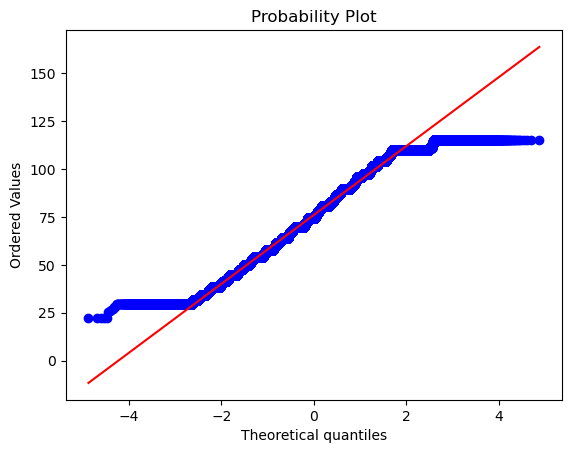

In [8]:
# performing box cox tranformation
# temp_box_cox = pd.DataFrame(columns = ['Box_cox_Transformatin'])
temp_box_cox, fitted_lambda = stats.boxcox(dataset_loan['loan_amnt'])
print(fitted_lambda)

print(pd.DataFrame(temp_box_cox).skew()[0])

stats.probplot(temp_box_cox, dist = 'norm', plot = plt)
plt.show()

If λ = 1 → no transformation (data unchanged).

If λ = 0 → log transformation.

If λ = 0.5 → square root transformation.

If λ = -1 → reciprocal transformation (1/x).

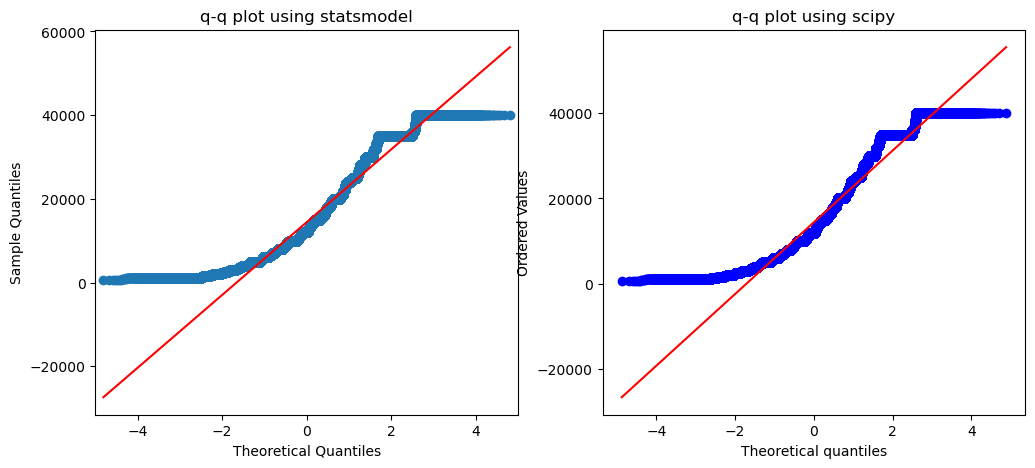

In [77]:
fig, axs = plt.subplots(1,2, figsize = (12,5))

sm.qqplot(dataset_loan['loan_amnt'], line = 's', ax = axs[0])
axs[0].set_title('q-q plot using statsmodel')


stats.probplot(dataset_loan['loan_amnt'], dist = 'norm', plot =axs[1])
axs[1].set_title('q-q plot using scipy')

plt.show()

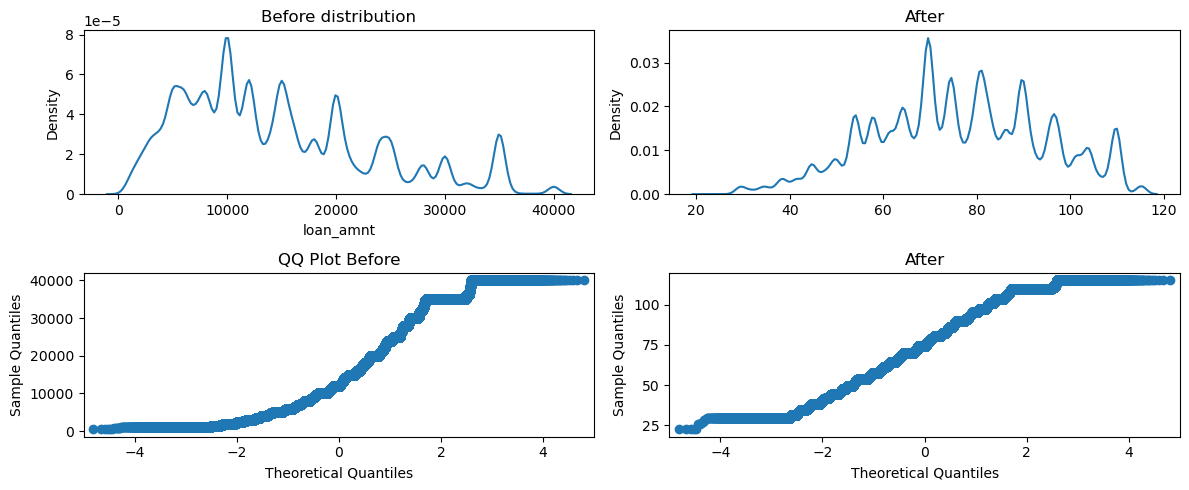

In [9]:
# show before and after the transformation comparison
fig, axs = plt.subplots(2,2,figsize = (12,5))

sns.kdeplot(dataset_loan['loan_amnt'], ax = axs[0,0])
axs[0,0].set_title('Before distribution')

sm.qqplot(dataset_loan['loan_amnt'], ax = axs[1,0])
axs[1,0].set_title('QQ Plot Before')

sns.kdeplot(temp_box_cox, ax = axs[0,1])
axs[0,1].set_title('After')

sm.qqplot(temp_box_cox, ax = axs[1,1])
axs[1,1].set_title('After')


plt.tight_layout()
plt.show()

In [36]:
detect_outliers(dataset_loan['loan_amnt'])

{'IQR_outliers': 0             1
 1            65
 2            82
 3            88
 4            93
 5           113
 6           146
 7           149
 8           153
 9           156
 10          169
 11          176
 12          179
 13          231
 14          237
 15          265
 16          276
 17          296
 18          358
 19          364
 20          365
 21          410
 22          416
 23          458
 24          468
 25          507
 26          517
 27          523
 28          534
 29          574
 30          643
 31          679
 32          708
 33          722
 34          743
 35          796
 36          815
 37          835
 38          870
 39          897
 40          922
 41         1047
 42         1063
 43         1110
 44         1126
 45         1132
 46         1150
 47         1162
 48         1180
 49         1230
 50         1248
 51         1263
 52         1304
 53         1320
 54         1333
 55         1338
 56         1363
 57         138

### int_rate

**int_rate** : Interest Rate on the Loan.

In [10]:
dataset_loan['int_rate'].describe()

count   1303607.00
mean         13.26
std           4.76
min           5.31
25%           9.75
50%          12.74
75%          15.99
max          30.99
Name: int_rate, dtype: float64

In [12]:
# check missing values 
dataset_loan['int_rate'].isnull().sum()

0

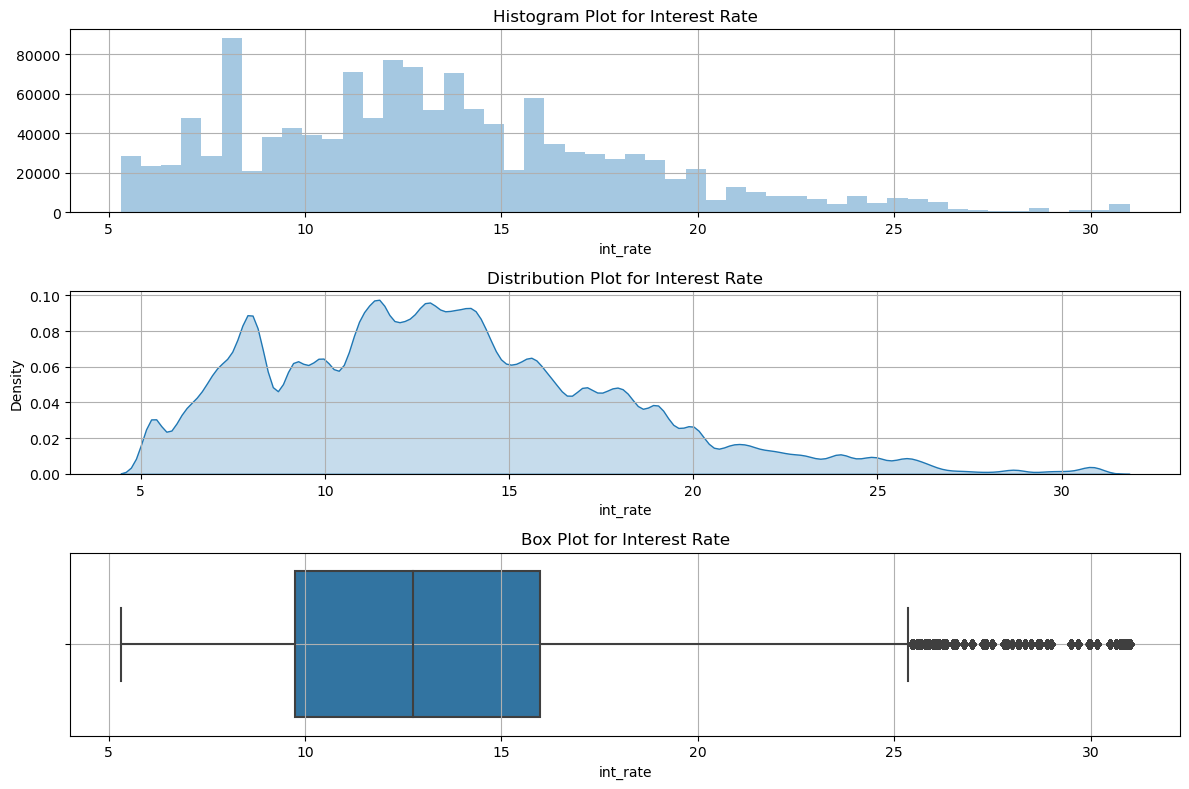

In [16]:
univariate_analysis_plot('int_rate', "Interest Rate",dataset = dataset_loan)

## installment

**installment** : The monthly payment owed by the borrower if the loan originates.


In [19]:
dataset_loan['installment'].describe()

count   1303607.00
mean        438.08
std         261.06
min           4.93
25%         248.82
50%         375.43
75%         580.45
max        1719.83
Name: installment, dtype: float64

In [20]:
# checking for missing values 
dataset_loan['installment'].isnull().sum()

0

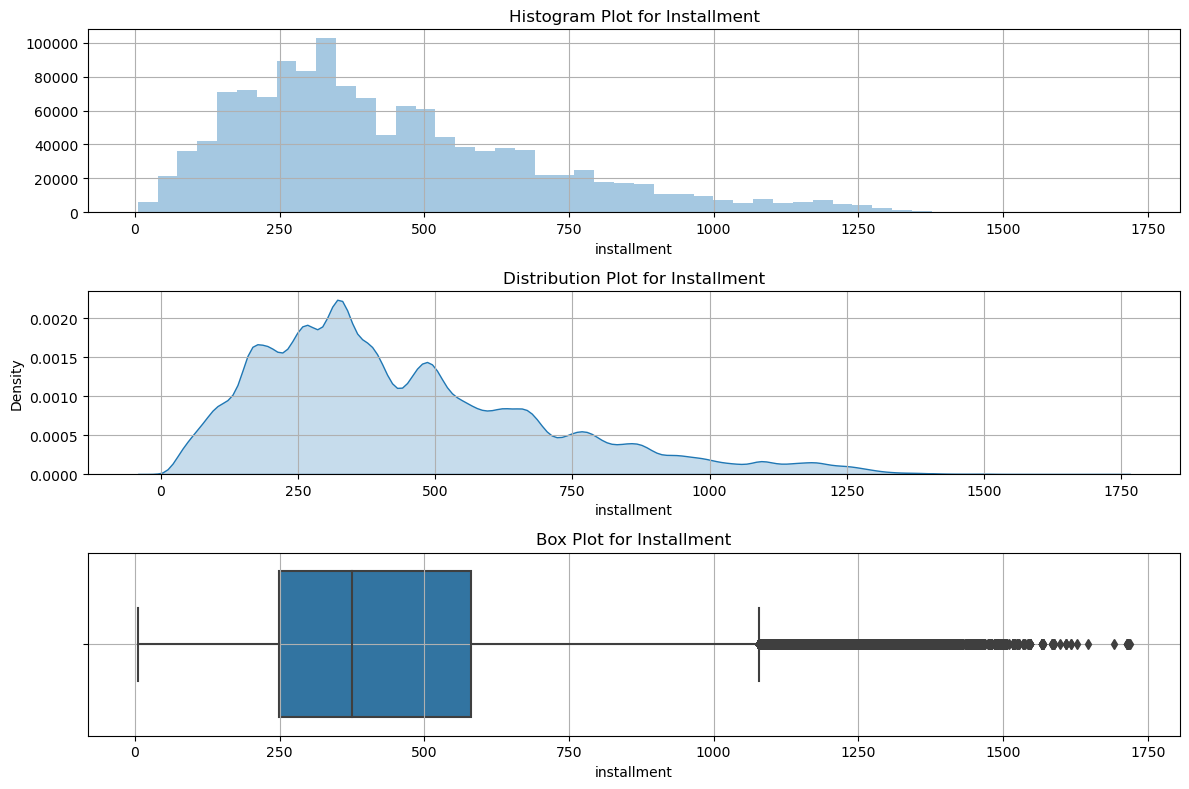

In [21]:
univariate_analysis_plot('installment', "Installment", dataset_loan)

## annual_inc

**annual_inc :**

In [ ]:
dataset_loan_lannual_inc_loan['annual']

In [18]:
numeric_features

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'policy_code',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mort_acc',
 'pub_rec_bankruptcies']

**NOTE**

We will make the observation which columns need the what kind of transformaiton, outlier removal and skewness check and once EDA is completed when we are doing Feature Engineering we can perform the outlier removal and data transformation before proceeding to modelling.

In [7]:
dataset_loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'policy_code', 'application_type',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

**Tasks**
   - adawdawd 
   - 
   - 
  
  
  


### Trial Codes

In [6]:
dataset_loan['loan_status'].isnull().sum()

0

### Loading Intermediate data

In [3]:
dataset_loan = pd.read_csv('./data/processed/temp_processed_data_1.csv')

### Saving intermediate data

In [76]:
dataset_loan.to_csv('./data/processed/temp_processed_data_1.csv', index = False)